# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data 
The original data came from the Cleveland data from the UCI Machine Learning Repository.https://archive.ics.uci.edu/ml/datasets/heart+disease

There isa also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
> To reach above 90% accuracy at predicting whether or not a patient has heart disease during the proof of concept

## 4. Features

Different information about each of the features in the data.

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
 + 0: Typical angina: chest pain related decrease blood supply to the heart
 + 1: Atypical angina: chest pain not related to heart
 + 2: Non-anginal pain: typically esophageal spasms (non heart related)
 + 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    + serum = LDL + HDL + .2 * triglycerides
    + above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    + '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    + 0: Nothing to note
    + 1: ST-T Wave abnormality
        + can range from mild symptoms to severe problems
        + signals non-normal heart beat
    + 2: Possible or definite left ventricular hypertrophy
        + Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    + 0: Upsloping: better heart rate with excercise (uncommon)
    + 1: Flatsloping: minimal change (typical healthy heart)
    + 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    + colored vessel means the doctor can see the blood passing through
    + the more blood movement the better (no clots)
13.  thal - thalium stress result
    + 1,3: normal
    + 6: fixed defect: used to be defect but ok now
    + 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools
We're going to use Pandas, Matplotlib and Numpy for the data analysis and manipulation

In [7]:
# Import all the tools we need
# Regular data analysis and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we want our plots to appear inside the notebook
%matplotlib inline 

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve



## Load data

In [8]:
df= pd.read_csv("heart-disease.csv")
df.shape #(rows, columns)

(303, 14)

## Data exploration
To find out more about the data
1. What questions are we trying to solve?
2. What kind of data do we have and how we treat different data types?
3. What's missing from the data and how do we deal with it?
4. What are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of the data


In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
# TO find out how many of each class there are
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

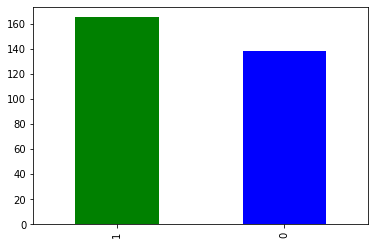

In [11]:
df["target"].value_counts().plot(kind="bar", color =["green", "blue"]);

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
#Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [15]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [16]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


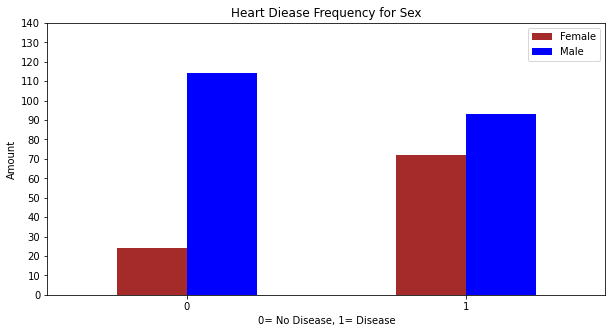

In [17]:
# Creat a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["brown", "blue"], figsize=(10,5))
plt.title("Heart Diease Frequency for Sex")
plt.xlabel("0= No Disease, 1= Disease")
plt.ylabel("Amount")
plt.yticks(np.arange(0,150,10))
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [18]:
df["thalach"].value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

## Age vs. Max Heart Rate for Heart Disease

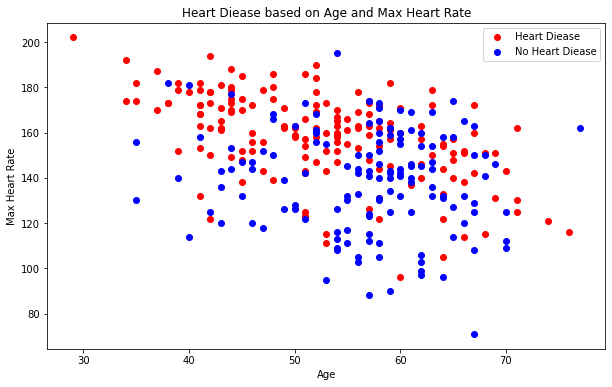

In [19]:
# Create another figure
plt.figure(figsize=(10,6))

#Scatter plot with positive examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1],
            color ="red");

#Scatter plot with negative examples
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0],
            color ="blue");

# Add info
plt.title("Heart Diease based on Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Diease", "No Heart Diease"]);

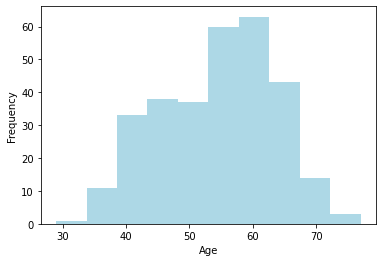

In [20]:
# Check distribution of Age 
df.age.plot.hist(color="lightblue")
plt.xlabel("Age");

### Heart Disease Frequency per Chest Pain
cp = chest pain type (4 values) :
+ 0: Typical angina: Chest pain related to decrease blood supply to the heart
+ 1: Atypical angina: Chest pain not related to the heart
+ 2: Non-angina: Typically esophageal spasms (non heart related)
+ 3: Asymptomatic: chest pain not showing signs of disease



In [21]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


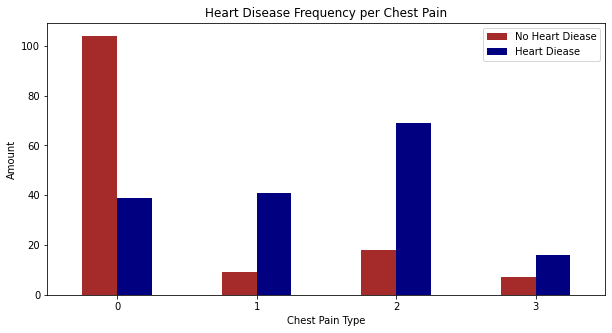

In [22]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,5), 
                                   color= ["brown","navy"])

# Add additional information
plt.title("Heart Disease Frequency per Chest Pain")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Heart Diease", "Heart Diease"])
plt.xticks(rotation=0);

In [23]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


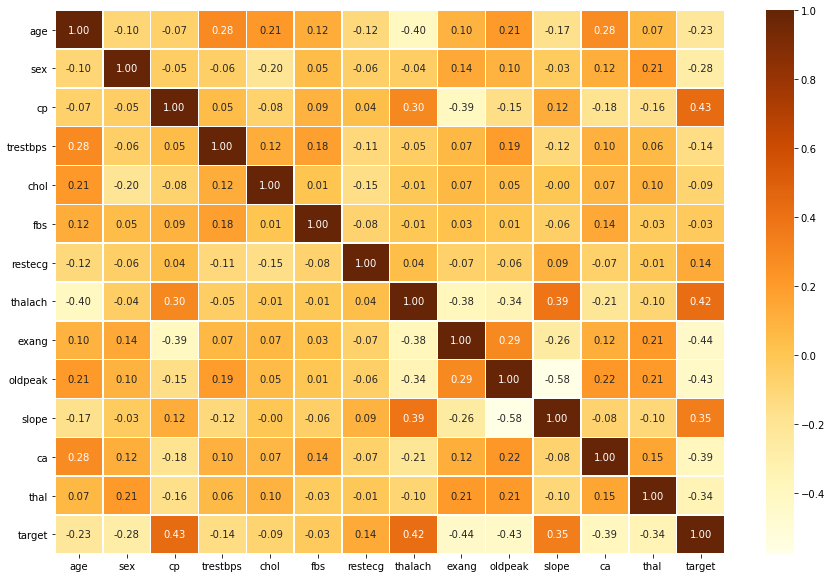

In [24]:
# Check correlation using seaborn
corr_matrix=df.corr()
fig, ax =plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
               annot= True,
                linewidths=0.5,
               fmt=".2f",
               cmap="YlOrBr")

## Modelling

In [25]:
# Split data in to X and y
X= df.drop("target", axis=1)
y=df["target"]

In [26]:
#Split data into train and testing sets
np.random.seed(5)
X_train,X_test, y_train, y_test= train_test_split(X,
                                                  y,
                                                  test_size=0.2)

## Train different machine learning models, test on testing data and comparing the results

+ Logistic Regression
+ K-Nearest Neighbours Classifier
+ Random Forest Classifier


In [27]:
#Put models in dictionary
models={"Logistic Regression": LogisticRegression(),
       "KNN": KNeighborsClassifier(),
       "Random Forest": RandomForestClassifier()}
# Creat a function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates give machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train, y_train: training data
    X_test, y_test: testing data
    """
    #set random seed
    np.random.seed(5)
    #make a dictionary to keep model scores
    model_scores={}
    #Loop through the models
    for name, model in models.items():
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [28]:
model_scores=fit_and_score(models=models, X_train= X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

C:\Users\rohan\Desktop\sample_project_1\heart-disease-project\env\enviroment.yml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9180327868852459,
 'KNN': 0.639344262295082,
 'Random Forest': 0.9016393442622951}

## Model Comparison

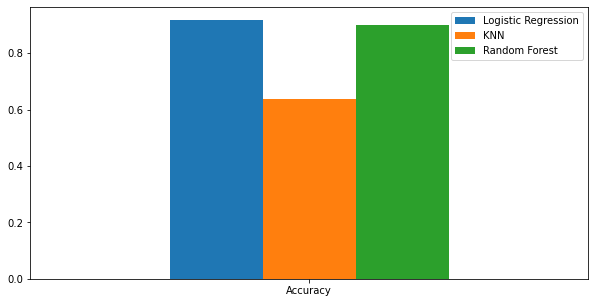

In [29]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.plot(kind="bar", figsize=(10,5))
plt.xticks(rotation=0);

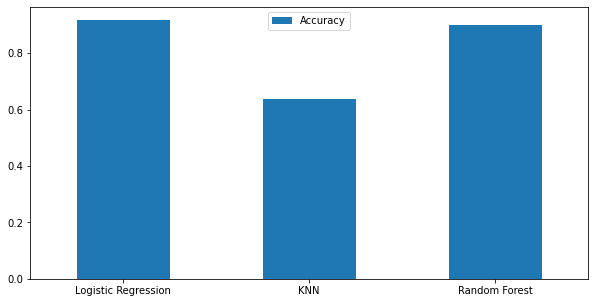

In [30]:
model_compare.T.plot(kind="bar", figsize=(10,5))
plt.xticks(rotation=0);

# Try to improve baseline models
+ Hyper parameter tuning
+ Feature importance
+ Confusion Matrix
+ Cross-validation
+ Precision
+ Recall
+ F1 score
+ Classification report
+ ROC curve
+ Area under the curve(AUC)

# Hyperparameter Tuning- KNN

In [31]:
train_scores= []
test_scores= []

np.random.seed(5)
#Create a list of different values of n_neightbors
neighbors = range(1,21)

#Setup KNN instance
knn= KNeighborsClassifier()

# Loop through different n_nieghbors

for i in neighbors:
    knn.set_params(n_neighbors= i)
    #Fit the algorithm
    knn.fit(X_train, y_train)
    
    #update training scores list
    
    train_scores.append(knn.score(X_train, y_train))
    
    #update testing scores list
    test_scores.append(knn.score(X_test,y_test))
    

In [32]:
test_scores

[0.5901639344262295,
 0.6229508196721312,
 0.6229508196721312,
 0.639344262295082,
 0.639344262295082,
 0.7049180327868853,
 0.7049180327868853,
 0.6721311475409836,
 0.6885245901639344,
 0.7049180327868853,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.6229508196721312,
 0.6065573770491803,
 0.5901639344262295,
 0.6229508196721312,
 0.6557377049180327,
 0.6885245901639344,
 0.639344262295082]

Text(0.5, 1.0, 'Maximum KNN score on the test data: 70.49%')

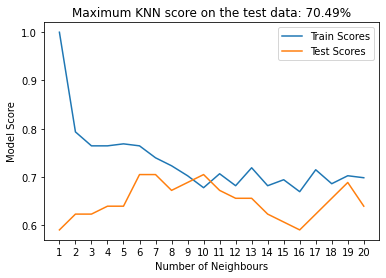

In [33]:
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label= "Test Scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbours")
plt.ylabel("Model Score")
plt.legend()

plt.title(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV
+ Logistic Regression  
+ Random Forest Classifier

In [34]:
# Create a hyperparameter grid for LogisticRegression
l_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}

# Create a hyperparameter set for RandomForestClassifier
rf_grid ={"n_estimators":np.arange(10,1000,50),
         "max_depth": [None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf": np.arange(1,20,2)}

In [35]:
np.random.seed(5)

rm_log_reg= RandomizedSearchCV(LogisticRegression(),
                               param_distributions=l_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
# Fit on training data
rm_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
#checking best hyperparameter
rm_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [37]:
#check tuned model score
rm_log_reg.score(X_test, y_test)

0.8852459016393442

In [38]:
# Tuning Hyperparameters for Random Forest Classifier
np.random.seed(5)

rm_rf_cl= RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=2)
# Fit on training data
rm_rf_cl.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=760; total time=   2.7s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=760; total time=   2.8s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=760; total time=   2.5s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=760; total time=   2.3s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=760; total time=   2.7s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=710; total time=   2.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=710; total time=   2.4s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=710; total time=   2.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=710; total time=   2.4s
[CV] END max_depth=3, min_sam

KeyboardInterrupt: 

In [39]:
#checking best hyperparameter
rm_rf_cl.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [ ]:
#check tuned model score
rm_rf_cl.score(X_test, y_test)

In [ ]:
model_scores

In [ ]:
## Hyperparamter Tuning with GridSearch CV

# Create a hyperparameter grid for LogisticRegression
l_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

# Create a hyperparameter set for RandomForestClassifier
rf_grid ={"n_estimators":np.arange(800,1000,50),
         "max_depth": [None,5,10],
         "min_samples_split":np.arange(2,10,2),
         "min_samples_leaf": np.arange(16,20,2)}


In [ ]:
#hyperparameter for LogisticRegression

np.random.seed(5)
gs_log_reg= GridSearchCV(LogisticRegression(),
                               param_grid=l_reg_grid,
                               cv=5,
                               verbose=True)
# Fit on training data
gs_log_reg.fit(X_train, y_train)

In [ ]:
#checking best hyperparameter
gs_log_reg.best_params_

In [ ]:
#check tuned model score
gs_log_reg.score(X_test, y_test)

In [329]:
# Tuning Hyperparameters for Random Forest Classifier
np.random.seed(5)

gs_rf_cl= GridSearchCV(RandomForestClassifier(),
                               param_grid=rf_grid,
                               cv=5,
                               verbose=2)
# Fit on training data
gs_rf_cl.fit(X_train, y_train)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END max_depth=None, min_samples_leaf=16, min_samples_split=2, n_estimators=800; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=16, min_samples_split=2, n_estimators=800; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=16, min_samples_split=2, n_estimators=800; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=16, min_samples_split=2, n_estimators=800; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=16, min_samples_split=2, n_estimators=800; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=16, min_samples_split=2, n_estimators=850; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=16, min_samples_split=2, n_estimators=850; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=16, min_samples_split=2, n_estimators=850; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=16, min_samples_split=2, n_estimators=850; total time=   1.8s
[C

[CV] END max_depth=None, min_samples_leaf=16, min_samples_split=8, n_estimators=950; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=18, min_samples_split=2, n_estimators=800; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=18, min_samples_split=2, n_estimators=800; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=18, min_samples_split=2, n_estimators=800; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=18, min_samples_split=2, n_estimators=800; total time=   2.5s
[CV] END max_depth=None, min_samples_leaf=18, min_samples_split=2, n_estimators=800; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=18, min_samples_split=2, n_estimators=850; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=18, min_samples_split=2, n_estimators=850; total time=   3.3s
[CV] END max_depth=None, min_samples_leaf=18, min_samples_split=2, n_estimators=850; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=18, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=18, min_samples_split=8, n_estimators=950; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=18, min_samples_split=8, n_estimators=950; total time=   2.6s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=2, n_estimators=800; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=2, n_estimators=800; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=2, n_estimators=800; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=2, n_estimators=800; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=2, n_estimators=800; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=2, n_estimators=850; total time=   2.3s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=2, n_estimators=850; total time=   2.3s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=2, n_estimators=850; tot

[CV] END max_depth=5, min_samples_leaf=18, min_samples_split=2, n_estimators=800; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=18, min_samples_split=2, n_estimators=800; total time=   2.4s
[CV] END max_depth=5, min_samples_leaf=18, min_samples_split=2, n_estimators=800; total time=   2.4s
[CV] END max_depth=5, min_samples_leaf=18, min_samples_split=2, n_estimators=800; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=18, min_samples_split=2, n_estimators=800; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=18, min_samples_split=2, n_estimators=850; total time=   2.4s
[CV] END max_depth=5, min_samples_leaf=18, min_samples_split=2, n_estimators=850; total time=   2.3s
[CV] END max_depth=5, min_samples_leaf=18, min_samples_split=2, n_estimators=850; total time=   2.4s
[CV] END max_depth=5, min_samples_leaf=18, min_samples_split=2, n_estimators=850; total time=   2.7s
[CV] END max_depth=5, min_samples_leaf=18, min_samples_split=2, n_estimators=850; total tim

[CV] END max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=800; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=800; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=800; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=850; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=850; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=850; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=850; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=850; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=900;

[CV] END max_depth=10, min_samples_leaf=18, min_samples_split=2, n_estimators=800; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=18, min_samples_split=2, n_estimators=800; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=18, min_samples_split=2, n_estimators=850; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=18, min_samples_split=2, n_estimators=850; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=18, min_samples_split=2, n_estimators=850; total time=   3.2s
[CV] END max_depth=10, min_samples_leaf=18, min_samples_split=2, n_estimators=850; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=18, min_samples_split=2, n_estimators=850; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=18, min_samples_split=2, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=18, min_samples_split=2, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=18, min_samples_split=2, n_estimators=900;

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': array([16, 18]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([800, 850, 900, 950])},
             verbose=2)

In [330]:
#checking best hyperparameter
gs_rf_cl.best_params_

{'max_depth': None,
 'min_samples_leaf': 18,
 'min_samples_split': 8,
 'n_estimators': 800}

In [ ]:
#check tuned model score
gs_rf_cl.score(X_test, y_test)

# Evaluating machine learning classifier model beyond accuracy

+ ROC and AUC curve
+ Confusion Matrix
+ Precision
+ Recall
+ F1 score

To make comparisons and evaluate models

# ROC and AUC curve(for Logistic Regression and Random Forest Classifier)

In [40]:
# Logistic regression
# Make predictions with tuned and baseline model

y_tuned_preds= gs_log_reg.predict(X_test)

model_base=LogisticRegression().fit(X_train, y_train)
y_base_preds=model_base.predict(X_test)


NameError: name 'gs_log_reg' is not defined

In [ ]:
# Plot ROC curve and calculate the AUC metric(Lo)
#tuned model
plot_roc_curve(gs_log_reg, X_test, y_test)
plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')
plt.title("Logistic Regression-Tuned Model")
#baseline model
plot_roc_curve(model_base, X_test, y_test)
plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')
plt.title("Logistic Regression-Baseline Model")


In [ ]:
# Random Forest Classfication
# Make predictions with tuned and baseline model

y_tuned_rf_preds= gs_rf_cl.predict(X_test)

model_rf_base=RandomForestClassifier().fit(X_train, y_train)
y_base_rf_preds=model_rf_base.predict(X_test)

y_base_rf_preds

In [ ]:
# Plot ROC curve and calculate the AUC metric(Lo)
#tuned model
plot_roc_curve(gs_rf_cl, X_test, y_test, color="green")
plt.plot([0, 1], [0, 1], color='blue', linewidth=2, linestyle='--')
plt.title("Random Forest Classifier-Tuned Model")
#baseline model
plot_roc_curve(model_rf_base, X_test, y_test, color="green")
plt.plot([0, 1], [0, 1], color='blue', linewidth=2, linestyle='--')
plt.title("Random Forest Classifier-Baseline Model");


# Confusion Matrix(for Logistic Regression and Random Forest Classifier)

In [43]:
# Define a function for confusion matrix(to plot on sns)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seabron's heatmap()
    """
    sns.set(font_scale=1.5)
    fig,ax = plt.subplots(figsize=(3,3))
    ax= sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

In [41]:
# Logistic Regression

#tuned model
plot_conf_mat(y_test,y_tuned_preds)
plt.title("Confusion Matrix-Logistic Reg-Tuned model")

#base model
plot_conf_mat(y_test,y_base_preds)
plt.title("Confusion Matrix-Logistic Reg-Base model");

NameError: name 'plot_conf_mat' is not defined

In [ ]:
# Random Forest Classifier

y_base_rf_preds
#tuned model
plot_conf_mat(y_test,y_tuned_rf_preds)
plt.title("Confusion Matrix-Random Forest-Tuned model")

#base model
plot_conf_mat(y_test,y_base_rf_preds)
plt.title("Confusion Matrix-Random Forest-Base model");

# Cross-validated-  Precision, Recall and F1 score

In [55]:
#Cross validate tuned model(for Logistic Regression)
#Cross validated accuracy
clf=LogisticRegression(C=2.592943797404667,
                      solver="liblinear")
cv_acc= cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="accuracy")
cv_acc= np.mean(cv_acc)
cv_acc

0.8248633879781421

In [52]:
#Cross validated precision
cv_precision= cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="precision")

cv_precision=np.mean(cv_precision)
cv_precision

0.8188009641520078

In [45]:
#Cross validated recall

cv_recall= cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="recall")

cv_recall=np.mean(cv_recall)
cv_recall

0.8787878787878787

In [53]:
#Cross validated F1 score
cv_f1= cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="f1")

cv_f1=np.mean(cv_f1)
cv_f1

0.8464039460644465

In [54]:
cv_acc,cv_precision,cv_recall, cv_f1

(0.8248633879781421,
 0.8188009641520078,
 0.8787878787878787,
 0.8464039460644465)

In [51]:
#Visualise cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "Recall":cv_recall,
                          "F1":cv_f1}, index=[0])
cv_metrics.T.plot(kind="bar", title="Cross-Validated Classification Metrics", legend=False)
plt.xticks(rotation=0);

NameError: name 'cv_precision' is not defined

In [48]:
#Cross validate base model(for Logistic Regression)
#accuracy
cv_base_acc= cross_val_score(LogisticRegression(),
                       X,
                       y,
                       cv=5,
                       scoring="accuracy")

cv_base_acc= np.mean(cv_base_acc)

#precision
cv_base_precision= cross_val_score(LogisticRegression(),
                       X,
                       y,
                       cv=5,
                       scoring="precision")

cv_base_precision= np.mean(cv_base_precision)

#recall
cv_base_recall= cross_val_score(LogisticRegression(),
                       X,
                       y,
                       cv=5,
                       scoring="recall")
cv_base_recall= np.mean(cv_base_recall)

#f1 score
cv_base_f1= cross_val_score(LogisticRegression(),
                       X,
                       y,
                       cv=5,
                       scoring="f1")

cv_base_f1= np.mean(cv_base_f1)

cv_base_acc,cv_base_precision,cv_base_recall,cv_base_f1

C:\Users\rohan\Desktop\sample_project_1\heart-disease-project\env\enviroment.yml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rohan\Desktop\sample_project_1\heart-disease-project\env\enviroment.yml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alterna

C:\Users\rohan\Desktop\sample_project_1\heart-disease-project\env\enviroment.yml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rohan\Desktop\sample_project_1\heart-disease-project\env\enviroment.yml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alterna

(0.8215846994535518,
 0.8189511535436832,
 0.8727272727272727,
 0.8432033990871707)

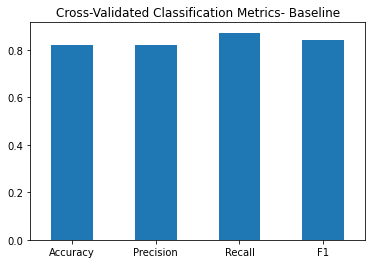

In [50]:
#Visualise cross-validated metrics on base model(for Logistic Regression)
cv_base_metrics = pd.DataFrame({"Accuracy":cv_base_acc,
                          "Precision":cv_base_precision,
                          "Recall":cv_base_recall,
                          "F1":cv_base_f1}, index=[0])
cv_base_metrics.T.plot(kind="bar", title="Cross-Validated Classification Metrics- Baseline", legend=False)
plt.xticks(rotation=0);

## Feature Importance

# Feature importance for Logistic Regression

In [57]:
# using tuned model, check coef
clf.fit(X_train, y_train)
clf.coef_

array([[ 0.00895107, -1.73503981,  0.79236432, -0.0179523 , -0.00581454,
         0.03732771,  0.59245664,  0.03501319, -0.93510949, -0.39008787,
         0.47532076, -0.71017856, -0.77590561]])

In [58]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.008951068436228228,
 'sex': -1.7350398125169169,
 'cp': 0.7923643152103435,
 'trestbps': -0.017952301007717438,
 'chol': -0.00581454055461618,
 'fbs': 0.0373277064528919,
 'restecg': 0.59245663902194,
 'thalach': 0.03501318572520247,
 'exang': -0.9351094949274498,
 'oldpeak': -0.3900878660382049,
 'slope': 0.47532075648969174,
 'ca': -0.710178556263775,
 'thal': -0.775905606696335}

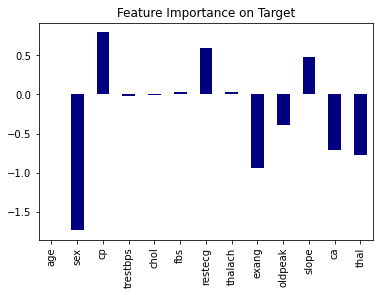

In [59]:
feature_df=pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot(kind="bar", title="Feature Importance on Target", legend= False, color= "navy");